# **Importar y Declaración de variables**



In [1]:
# Librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import urllib.error


# Diccionario de URLs con nombres de tiendas
urls = {
    'Tienda 1': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv',
    'Tienda 2': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
    'Tienda 3': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
    'Tienda 4': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
}

# Lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo CSV
for nombre_tienda, url in urls.items():
    try:
        df = pd.read_csv(url)
        if 'Precio' not in df.columns:
            raise ValueError(f"La columna 'Precio' no está presente en {nombre_tienda}")
        df['Tienda'] = nombre_tienda
        dataframes.append(df)
    except urllib.error.URLError:
        print(f"No se pudo acceder al archivo de {nombre_tienda}")
    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")

# Combinar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Definir colores diferentes para cada tienda
colores = {
    "Tienda 1": "#FF6F61",  # Rojo suave
    "Tienda 2": "#6B5B95",  # Azul/violeta
    "Tienda 3": "#88B04B",  # Verde oliva
    "Tienda 4": "#FFA500"   # Naranjo
}

#**1. Análisis de facturación**

### Cálculo de ingreso total por tienda

In [ ]:
# Calcular el ingreso total por tienda
ingresos_por_tienda = df_final.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)

for tienda, ingreso in ingresos_por_tienda.items():
    # Imprime cada par nombre de tienda e ingreso formateado a 0 decimales
    print(f"{tienda}: ${ingreso:.0f}")


Tienda 1: $1150880400
Tienda 2: $1116343500
Tienda 3: $1098019600
Tienda 4: $1038375700


###Gráfico de Ingreso Total

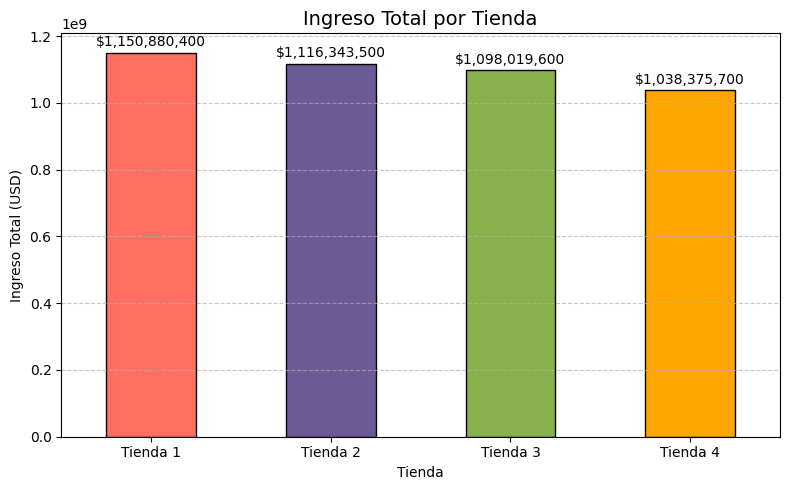

In [ ]:
# Crear gráfico de barras con anotaciones de valores
plt.figure(figsize=(8, 5))
bars = ingresos_por_tienda.plot(
    kind='bar',
    color=[colores[tienda] for tienda in ingresos_por_tienda.index],
    edgecolor='black'
)

plt.title("Ingreso Total por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total (USD)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas con los valores encima de cada barra
for i, valor in enumerate(ingresos_por_tienda):
    plt.text(i, valor + (valor * 0.01), f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


###Conclusión: Ingreso Total por Tienda

Tras sumar los valores de la columna **Precio** para cada tienda, se observa que:

- La tienda con mayores ingresos es **Tienda 1**, lo que sugiere un mayor volumen o precio de ventas.
- Las diferencias entre *tiendas* pueden deberse a factores como ubicación, mix de productos o estrategias de venta.

Este análisis establece una primera perspectiva para evaluar el rendimiento financiero de cada tienda.


#**2. Ventas por categoría**

###Cálculo Venta por Categoría

In [ ]:
try:
  ventas_categoria = df_final.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index()
  ventas_categoria.rename(columns={'Producto': 'Cantidad Vendida'}, inplace=True)
  # Ver los primeros resultados
  ventas_categoria.sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False])
  print(ventas_categoria)
except Exception as e:
  print(f"Error en el cálculo de ventas por categoría: {e}")

      Tienda   Categoría del Producto  Cantidad Vendida
0   Tienda 1  Artículos para el hogar               171
1   Tienda 1     Deportes y diversión               284
2   Tienda 1        Electrodomésticos               312
3   Tienda 1             Electrónicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Artículos para el hogar               181
9   Tienda 2     Deportes y diversión               275
10  Tienda 2        Electrodomésticos               305
11  Tienda 2             Electrónicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Muebles               442
16  Tienda 3  Artículos para el hogar           

###Gráfico Venta por Categoría

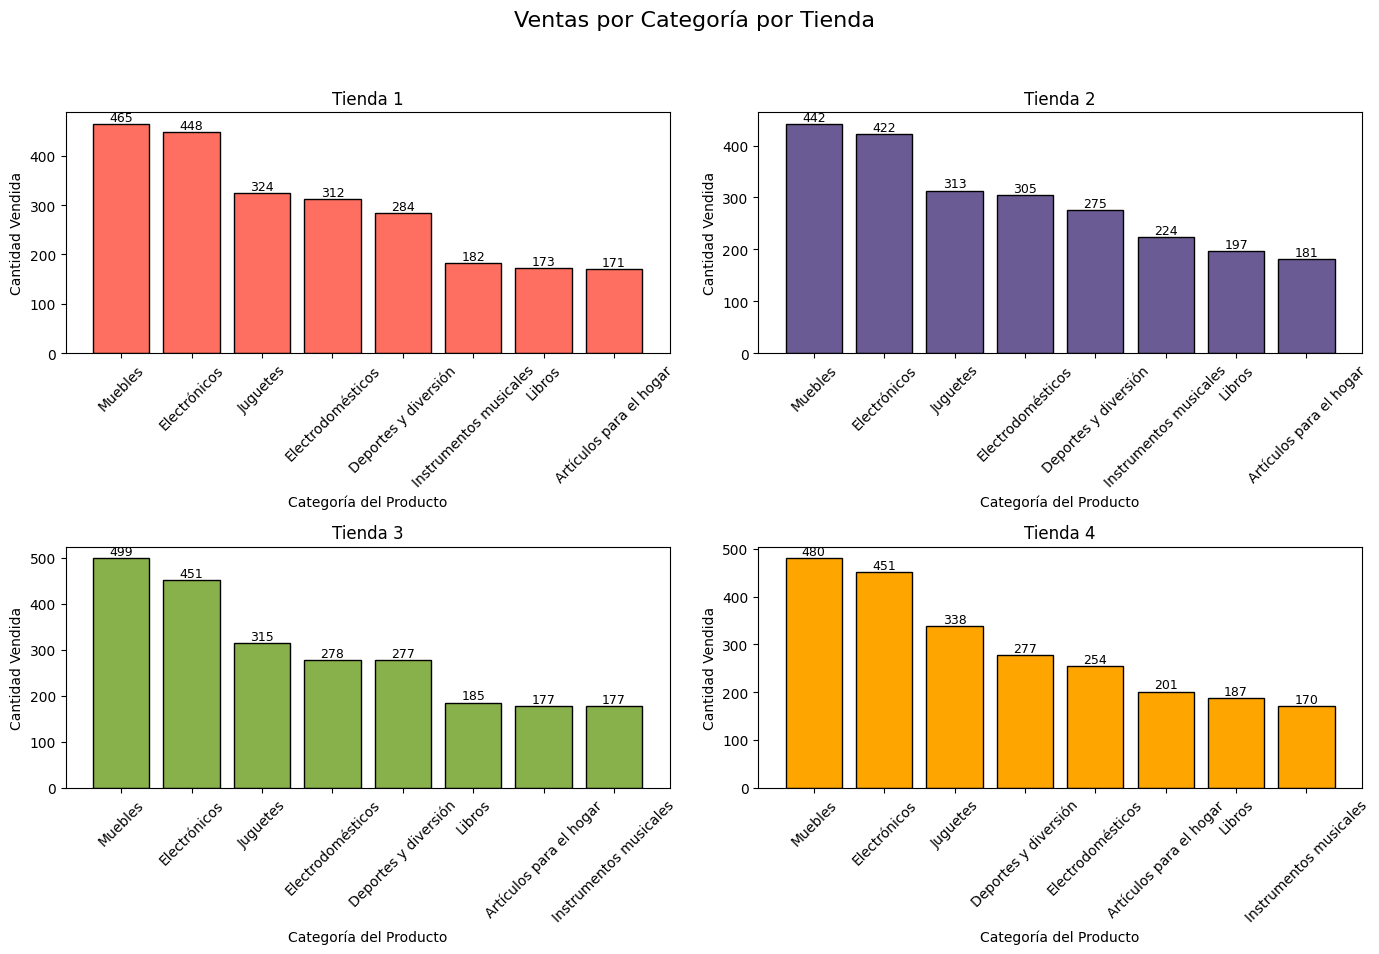

In [ ]:
# Crear un gráfico por tienda
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Ventas por Categoría por Tienda', fontsize=16)

tiendas_unicas = ventas_categoria['Tienda'].unique()

for i, tienda in enumerate(tiendas_unicas):
    ax = axs[i//2, i%2]
    datos_tienda = ventas_categoria[ventas_categoria['Tienda'] == tienda]
    datos_tienda = datos_tienda.sort_values(by='Cantidad Vendida', ascending=False)

    ax.bar(
        datos_tienda['Categoría del Producto'],
        datos_tienda['Cantidad Vendida'],
        color=colores[tienda],
        edgecolor='black'
    )
    ax.set_title(tienda)
    ax.set_xlabel('Categoría del Producto')
    ax.set_ylabel('Cantidad Vendida')
    ax.tick_params(axis='x', rotation=45)

    # Etiquetas
    for j, valor in enumerate(datos_tienda['Cantidad Vendida']):
        ax.text(j, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###Conclusión: Ventas por Categoría

Al analizar la cantidad de productos vendidos por categoría en cada tienda, se observan patrones consistentes y diferencias relevantes:

- Cada tienda muestra una concentración de ventas en una o dos categorías predominantes.
- Esto puede indicar un enfoque estratégico en ciertos segmentos de productos, o bien preferencias claras del público objetivo.
- Conocer las categorías más populares permite enfocar esfuerzos de marketing y optimización del inventario por tienda.

Este análisis aporta información clave para tomar decisiones comerciales más precisas según el comportamiento de compra.


#**3. Calificación promedio de la tienda**

###Cálculo calificación promedio de la tienda

In [ ]:
# Verificar si existe la columna de calificación
try:
  if 'Calificación' not in df_final.columns:
      raise ValueError("No se encontró la columna 'Calificación' en el dataset.")

  #Calcular la calificación promedio por tienda
  calificacion_promedio = df_final.groupby('Tienda')['Calificación'].mean().round(2)
  orden_manual = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
  calificacion_promedio = calificacion_promedio[orden_manual]
  print(calificacion_promedio)
except Exception as e:
  print(f"Error en el cálculo de la calificación promedio: {e}")

Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


##Gráfico de Calificación Promedio ordenado por Tienda 1 → Tienda 4

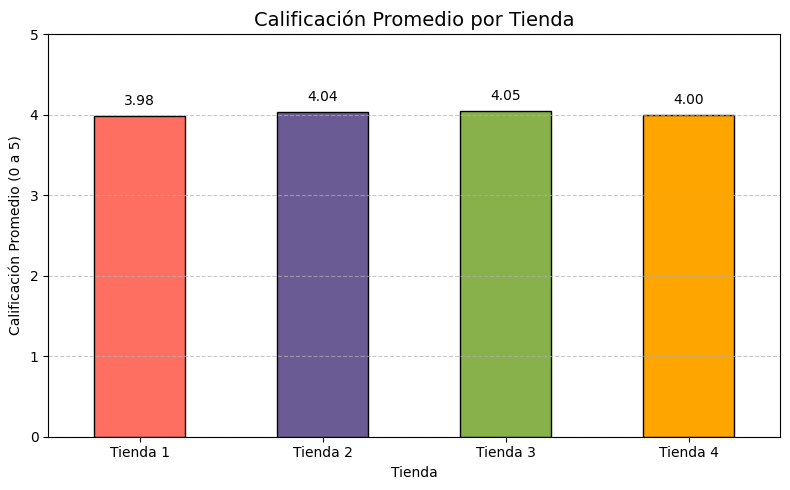

In [ ]:
# Crear gráfico de barras con orden manual
plt.figure(figsize=(8, 5))
calificacion_promedio = calificacion_promedio.reindex(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

bars = calificacion_promedio.plot(
    kind='bar',
    color=[colores[tienda] for tienda in calificacion_promedio.index],
    edgecolor='black'
)

plt.title("Calificación Promedio por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio (0 a 5)")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas de valor sobre las barras
for i, valor in enumerate(calificacion_promedio):
    plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


##Conclusión: Calificación Promedio por Tienda

Este análisis permite identificar el nivel de satisfacción de los clientes con cada tienda:

- La tienda con mejor calificación promedio es **Tienda 3**, indicando una experiencia más satisfactoria según sus compradores.
- Las calificaciones más bajas podrían relacionarse con demoras en el envío, calidad de productos u otros factores.

Esta métrica es fundamental para evaluar la percepción del servicio y definir acciones de mejora continua.


#**4. Productos Más y Menos vendidos**

###Cálculo Producto Más o Menos vendidos

In [2]:
# Agrupar y contar productos por tienda
ventas_productos = df_final.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Lista de resultados
productos_extremos = []

# Recorrer cada tienda
for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    datos_tienda = ventas_productos[ventas_productos['Tienda'] == tienda]

    producto_mas_vendido = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmax()]
    producto_menos_vendido = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmin()]

    productos_extremos.append({
        'Tienda': tienda,
        'Producto más vendido': producto_mas_vendido['Producto'],
        'Cantidad más vendida': producto_mas_vendido['Cantidad Vendida'],
        'Producto menos vendido': producto_menos_vendido['Producto'],
        'Cantidad menos vendida': producto_menos_vendido['Cantidad Vendida']
    })

# Crear DataFrame final ordenado por tienda
tabla_extremos = pd.DataFrame(productos_extremos).sort_values(by='Tienda')

# Mostrar como tabla
from IPython.display import display
display(tabla_extremos)


,Tienda,Producto más vendido,Cantidad más vendida,Producto menos vendido,Cantidad menos vendida
0,Tienda 1,Armario,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


###Gráfico producto Más y Menos vendido por tienda

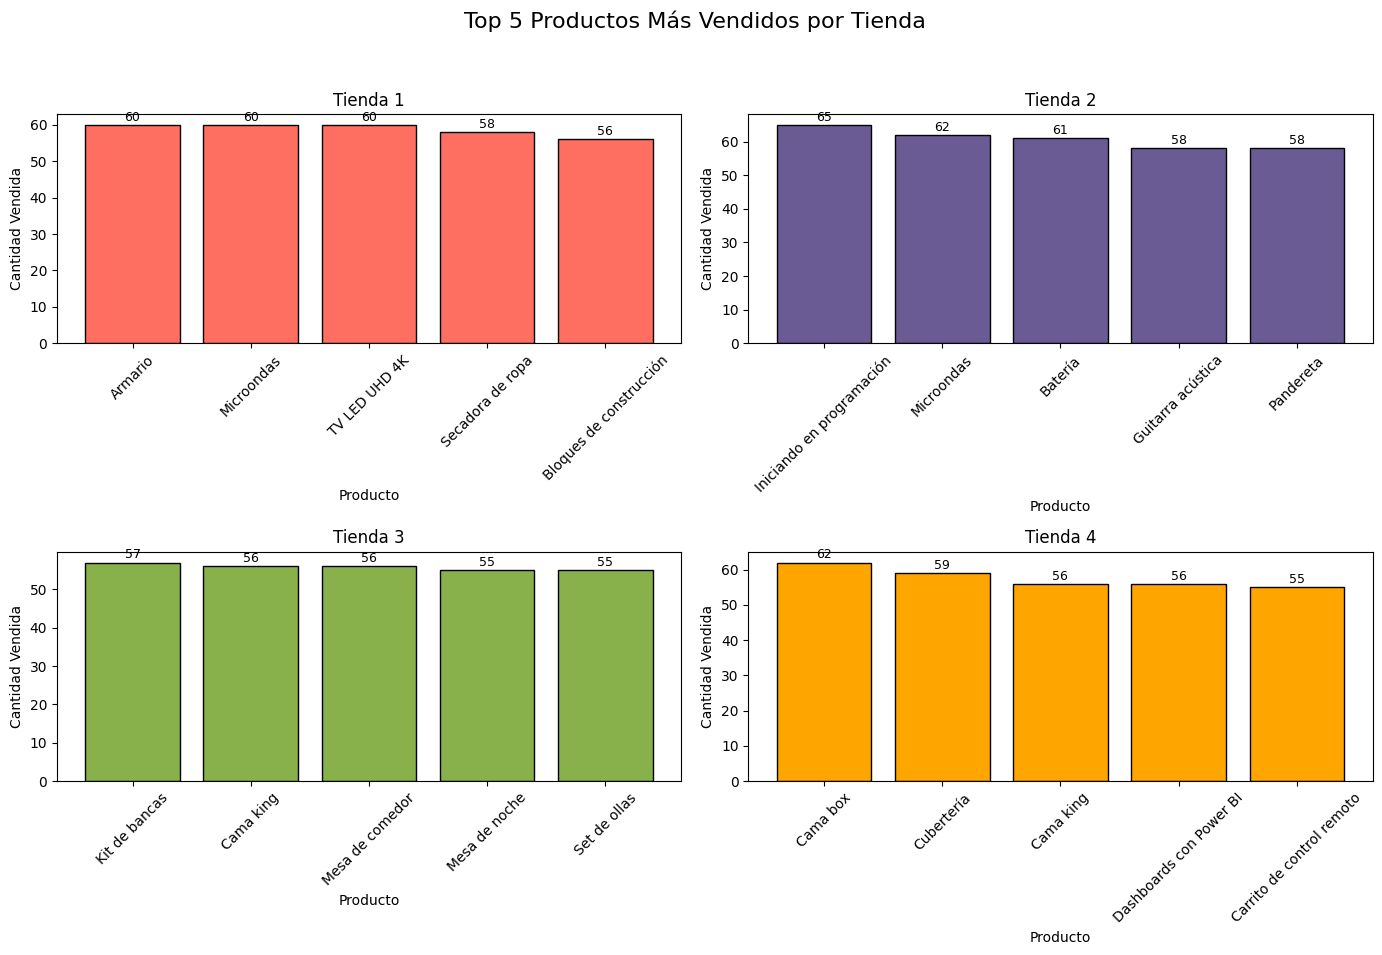

In [3]:
# Crear subgráficos para los Top 5 productos más vendidos por tienda
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 Productos Más Vendidos por Tienda', fontsize=16)

for i, tienda in enumerate(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
    ax = axs[i//2, i%2]
    top5 = ventas_productos[ventas_productos['Tienda'] == tienda].nlargest(5, 'Cantidad Vendida')
    bars = ax.bar(
        top5['Producto'],
        top5['Cantidad Vendida'],
        color=colores[tienda],
        edgecolor='black'
    )
    ax.set_title(tienda)
    ax.set_xlabel('Producto')
    ax.set_ylabel('Cantidad Vendida')
    ax.tick_params(axis='x', rotation=45)

    for j, valor in enumerate(top5['Cantidad Vendida']):
        ax.text(j, valor + 0.3, str(valor), ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###Conclusión: Productos Más y Menos vendidos

Este análisis permite identificar claramente qué productos dominan las ventas y cuáles tienen baja rotación en cada tienda:

- En cada tienda, el producto más vendido destaca significativamente sobre el resto, reflejando la preferencia del cliente o una posible estrategia comercial.
- Por otro lado, los productos con menor venta podrían representar oportunidades de mejora en promoción, revisión de stock o incluso ser candidatos para ser reemplazados.

Identificar estos extremos en el portafolio de productos permite tomar decisiones basadas en datos para mejorar la eficiencia comercial.


#**5. Envío promedio por tienda**

###Cálculo Valor del envío promedio por tienda

In [ ]:
# Verificar existencia de columna
if 'Costo de envío' not in df_final.columns:
    raise ValueError("No se encontró la columna 'Costo de envío' en el dataset.")

# Calcular el valor promedio del envío por tienda
envio_promedio = df_final.groupby('Tienda')['Costo de envío'].mean().round(0)

# Orden manual para consistencia visual
orden_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envio_promedio = envio_promedio.reindex(orden_tiendas)

envio_promedio


,Costo de envío
Tienda,
Tienda 1,26019.0
Tienda 2,25216.0
Tienda 3,24806.0
Tienda 4,23459.0


##Gráfico Costo Promedio de Envío

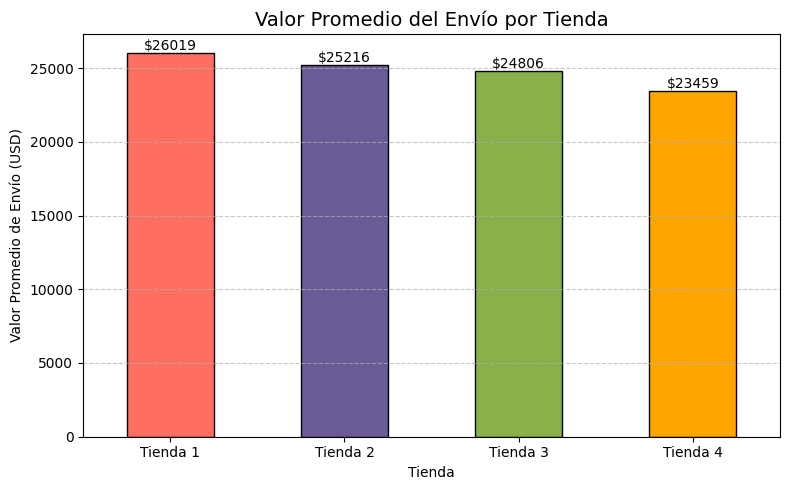

In [ ]:
plt.figure(figsize=(8, 5))
bars = envio_promedio.plot(
    kind='bar',
    color=[colores[tienda] for tienda in envio_promedio.index],
    edgecolor='black'
)

plt.title("Valor Promedio del Envío por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Valor Promedio de Envío (USD)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas de valor sobre cada barra
for i, valor in enumerate(envio_promedio):
    plt.text(i, valor + 0.1, f"${valor:.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##Conclusión: Valor del Envío Promedio por Tienda

El análisis del costo promedio de envío por tienda revela diferencias que podrían estar relacionadas con la ubicación geográfica, convenios logísticos o tamaño promedio de los productos:

- La tienda con el **envío más económico** es **Tienda 4**, lo cual puede representar una ventaja competitiva.
- En contraste, la tienda con el **envío más costoso** podría necesitar revisar su estructura de costos o condiciones de despacho.

Esta métrica puede influir directamente en la conversión de ventas y satisfacción del cliente, por lo que es clave monitorearla.
